**1. Data Cleaning**
*  Read the dataset into a Pandas DataFrame
* Handle any missing or inconsistent data.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# File paths
fb_path = "Copy of Facebook_Analytics - DO NOT DELETE (for interview purposes).xlsx"
ig_path = "Copy of Instagram_Analytics - DO NOT DELETE (for interview purposes).xlsx"

# Load the Excel files
fb_excel = pd.ExcelFile(fb_path)
ig_excel = pd.ExcelFile(ig_path)

# Load the relevant sheets
fb_engagement_df = fb_excel.parse("Facebook Post Engagement")
ig_engagement_df = ig_excel.parse("Instagram Post Engagement")

In [35]:
# Clean Facebook data
fb_engagement_df = fb_engagement_df.iloc[1:]  # Remove header row duplicates
fb_engagement_df = fb_engagement_df.rename(columns={
    "Post creation date": "Date",
    "Post reach": "Post Reach",
    "Total post reactions": "Reactions",
    "Comments on posts": "Comments",
    "Shares on shares": "Shares"
})
fb_engagement_df["Date"] = pd.to_datetime(fb_engagement_df["Date"], errors='coerce') # Convert Date column to datetime
fb_engagement_df[["Reactions", "Comments", "Shares", "Post Reach"]] = fb_engagement_df[["Reactions", "Comments", "Shares", "Post Reach"]].apply(pd.to_numeric, errors='coerce')
fb_engagement_df["Engagement"] = (fb_engagement_df["Reactions"] + fb_engagement_df["Comments"] + fb_engagement_df["Shares"]) / fb_engagement_df["Post Reach"] * 100
fb_engagement_df.head(2)

,Post ID,Date,Post message,Post type,Post impressions,Post organic reach,% of reach from paid,% of reach from organic,Post Reach,Shares on posts,Reactions,Post photo views,Video views,Comments,Shares,Organic video views,Post link clicks,RowHash,Engagement
2,108778868994125_128429563695722,2023-10-06,Use this daily ritual to help wire your child'...,native_templates,5,5,0,100,5,0,0,0,0,0,0,0,0,b9eab858a7bdf927757d30fb131f41891bb5ea5d163e97...,0.000000
3,108778868994125_122219331434027157,2025-01-19,Comment ‘CLASS’ to sign up to my free mastercl...,photo,159,145,0,100,145,0,1,0,0,2,0,0,0,f58cdaefc106439e0196fb734eb3090d28152d9e53056d...,2.068966


In [33]:
# Clean Instagram data
ig_engagement_df = ig_engagement_df.rename(columns={
    "Date": "Date",
    "Media reach": "Post Reach",
    "Like count": "Likes",
    "Comments count": "Comments",
    "Shares": "Shares",
    "Unique saves": "Saves",
    "Media product type": "Post Type"
})
ig_engagement_df["Date"] = pd.to_datetime(ig_engagement_df["Date"], errors='coerce') # Convert Date column to datetime
ig_engagement_df[["Likes", "Comments", "Shares", "Saves", "Post Reach"]] = ig_engagement_df[["Likes", "Comments", "Shares", "Saves", "Post Reach"]].apply(pd.to_numeric, errors='coerce')
ig_engagement_df["Engagement"] = (ig_engagement_df["Likes"] + ig_engagement_df["Comments"] + ig_engagement_df["Shares"] + ig_engagement_df["Saves"]) / ig_engagement_df["Post Reach"] * 100
ig_engagement_df.head(2)

,Date,Media ID,Media caption,Post Type,Media impressions,Post Reach,Likes,Comments,Shares,Saves,Video views,RowHash,Engagement
0,2025-01-19,17902204887015249,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,2.579853
1,2025-01-18,18071205646706820,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,741,695,8,2,0,1,0,55102c6de8e1a68e015c44e3c8a600d06088fa042c29d0...,1.582734


**2. Basic Analysis***  Calculate the average engagement rate for Instagram posts
* • Identify the top-performing post based on engagement (likes, comments, shares).

In [38]:
# Calculate average engagement rate for Instagram
average_ig_engagement = ig_engagement_df["Engagement"].mean()
print(f"Average Instagram Engagement Rate: {average_ig_engagement:.2f}%")

Average Instagram Engagement Rate: 5.50%


In [42]:
# Identify the top-performing post based on engagement
fb_top_post = fb_engagement_df.loc[fb_engagement_df["Engagement"].idxmax()]
ig_top_post = ig_engagement_df.loc[ig_engagement_df["Engagement"].idxmax()]

print("Top Facebook Post:")
print(fb_top_post)
print("\nTop Instagram Post:")
print(ig_top_post)

Top Facebook Post:
Post ID                                   108778868994125_122150368088027157
Date                                                     2024-01-14 00:00:00
Post message                                                             NaN
Post type                                                      profile_media
Post impressions                                                          38
Post organic reach                                                        36
% of reach from paid                                                       0
% of reach from organic                                                  100
Post Reach                                                                36
Shares on posts                                                            0
Reactions                                                                  2
Post photo views                                                           0
Video views                                              

**3. Visualization**
*  Create a simple line chart showing post engagement trends over time
* • Plot a bar chart comparing different post types (Reels vs. Static Posts).

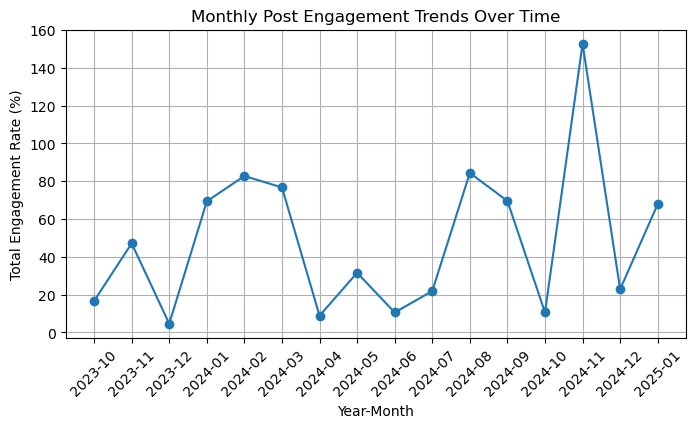

In [49]:
# Merge both datasets
engagement_df = pd.concat([fb_engagement_df[["Date", "Engagement"]], ig_engagement_df[["Date", "Engagement"]]])
engagement_df = engagement_df.dropna().sort_values("Date")

# Group by month and year
engagement_df["Year-Month"] = engagement_df["Date"].dt.to_period("M")
monthly_engagement = engagement_df.groupby("Year-Month")["Engagement"].sum().reset_index()

# Convert Period to string for plotting
monthly_engagement["Year-Month"] = monthly_engagement["Year-Month"].astype(str)

# Plot monthly engagement trend
plt.figure(figsize=(8, 4))
plt.plot(monthly_engagement["Year-Month"], monthly_engagement["Engagement"], marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Total Engagement Rate (%)")
plt.title("Monthly Post Engagement Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

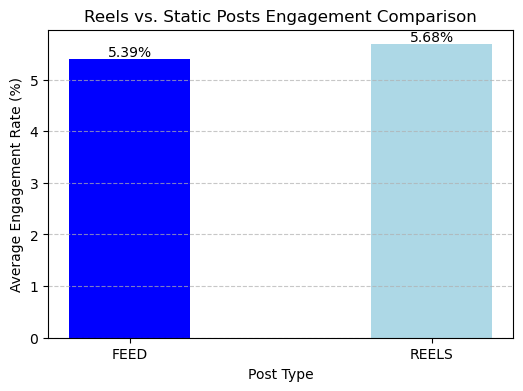

In [63]:
# Compare engagement between Reels and Static Posts
post_type_engagement = ig_engagement_df.groupby("Post Type")["Engagement"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
bars=plt.bar(post_type_engagement["Post Type"], post_type_engagement["Engagement"], color=['blue', 'lightblue'], width=0.4)
plt.xlabel("Post Type")
plt.ylabel("Average Engagement Rate (%)")
plt.title("Reels vs. Static Posts Engagement Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

**4. Bonus Task**
*  Write a function that predicts whether a post will perform well based on previous
engagement data (e.g., using a simple threshold model).

In [68]:
# Function to predict post performance
def predict_post_performance(engagement_rate, threshold=average_ig_engagement):
    return "High" if engagement_rate >= threshold else "Low"

# Example usage
ig_engagement_df["Performance Prediction"] = ig_engagement_df["Engagement"].apply(predict_post_performance)
print(ig_engagement_df[["Date", "Engagement", "Performance Prediction"]].head())

        Date  Engagement Performance Prediction
0 2025-01-19    2.579853                    Low
1 2025-01-18    1.582734                    Low
2 2025-01-17    3.061224                    Low
3 2025-01-16    3.593750                    Low
4 2025-01-15    2.257636                    Low
